[CV](https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_Calculated_Variables_Version4_08_10_17-508c.pdf)
(all_feat)[https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf]

In [77]:
from functions.helpers import *
from functions.implementations import *
from functions.my_functions import *
import numpy as np
import pandas as pd

In [160]:
# Import df
df = pd.read_csv("data/dataset/x_train.csv")

# Feature Selection

In [165]:
# Select columns that we are going to use for the analysis

data_dict = {
    # "name of the var": ["synbol for nan", type of varibale]
    # if "nan" --> means to create a new class for missing values
    # if "no_missing" --> no need for NaN impuation
    # if "countousn" --> put mean
    # if "N" --> trnasg all NaN in that N
    "ACTIN11_": ["nan", "discrete"],
    "ACTIN21_": ["nan", "discrete"],
    "DROCDY3_": [900, "continous"],
    "FC60_": [999, "continous"], # ATTENTION, WAS WRITTE 99900 ..> but in reality is 999
    "FRUTDA1_": ["nan", "continous"],
    "_FRTRESP": ["no_missing", "discrete"],
    "_FRUITEX": ["no_missing", "discrete"],
    "_FRUTSUM": ["nan", "continous"],
    "_HCVU651": [9, "discrete"],
    "_HISPANC": [9, "discrete"],
    "_INCOMG": [9, "discrete"],
    "_LMTACT1": [9, "discrete"],
    "_LMTSCL1": [9, "discrete"],
    "_LMTWRK1": [9, "discrete"],
    "_LTASTH1": [9, "discrete"],
    "_MINAC11": ["nan", "continous"],
    "_MINAC21": ["nan", "continous"],
    "_MISFRTN": ["no_missing", "discrete"],
    "_MISVEGN": ["no_missing", "discrete"],
    "_MRACE1": ["no_missing", "discrete"],
    "_PA30021": [9, "discrete"],
    "_PA150R2": [9, "discrete"],
    "_PA300R2": [9, "discrete"],
    "_PACAT1": [9, "discrete"],
    "_PAINDX1": [9, "discrete"],
    "_PAREC1": [9, "discrete"],
    "_PASTAE1": [9, "discrete"],
    "_PASTRNG": [9, "discrete"],
    "_PNEUMO2": [9, "discrete"],
    "_RACE": [9, "discrete"],
    "_RACEG21": [9, "discrete"],
    "_RACEGR3": [9, "discrete"],
    "_RACE_G1": ["nan", "discrete"],
    "_RFBING5": [9, "discrete"],
    "_RFBMI5": [9, "discrete"],
    "_RFCHOL": [9, "discrete"],
    "_RFDRHV5": [9, "discrete"],
    "_RFHLTH": [9, "discrete"],
    "_RFHYPE5": [9, "discrete"],
    "_RFSEAT2": [9, "discrete"],
    "_RFSEAT3": [9, "discrete"],
    "_RFSMOK3": [9, "discrete"],
    "_SMOKER3": [9, "discrete"],
    "_TOTINDA": [9, "discrete"],
    "_VEG23": [0, "discrete"],
    "_VEGESUM": ["nan", "continous"],
    "_VEGETEX": [1, "discrete"],
    "_VEGLT1": [9, "discrete"],
    "GRENDAY_": ["nan", "continous"],
    "MAXVO2_": [999, "continous"], # ATTENTION, WAS WRITTE 99900 ..> but in reality is 999
    "METVL11_": ["nan", "continous"],
    "METVL21_": ["nan", "continous"],
    "ORNGDAY_": ["nan", "continous"],
    "PA1MIN_": ["nan", "continous"],
    "PA1VIGM_": ["nan", "continous"],
    "PADUR1_": ["nan", "continous"],
    "PADUR2_": ["nan", "continous"],
    "PAFREQ1_": [99000, "continous"],
    "PAFREQ2_": [99000, "continous"],
    "PAMIN11_": ["nan", "continous"],
    "PAMIN21_": ["nan", "continous"],
    "PAMISS1_": [9, "discrete"],
    "PAVIG11_": ["nan", "continous"],
    "PAVIG21_": ["nan", "continous"],
    "VEGEDA1_": ["nan", "continous"],
    "_AGE80": ["nan", "continous"],
    "_AIDTST3": [9, "discrete"],
    "_ASTHMS1": [9, "discrete"],
    "_BMI5": ["nan", "continous"],
    "_CASTHM1": [9, "discrete"],
    "_CHLDCNT": [9, "discrete"],
    "_CHOLCHK": [9, "discrete"],
    "_DRDXAR1": ["nan", "discrete"],
    "_DRNKWEK": [99900, "continous"],
    "_EDUCAG": [9, "discrete"],
    "_FLSHOT6": [9, "discrete"],
    "_FRT16": [0, "discrete"],
    "_FRTLT1": [9, "discrete"]
}

"""
VC calculated but not used because
    - not present in out dataset: '_MICHD', '_VEGRESP" "FTJUDA1_', 'PAINACT2'
    - make no sense: 
        "_LLCPWT" "_DUALCOR" "_DUALUSE" --> HIDDEN or cell phone
        ("_AGE65YR" "_AGEG5YR" _AGE_G--> alredy rpesent in AGE80) 
        "_BMI5CAT" --> altry in _BMI
    # do not like it
        -"_PRACE1": [99/77, "discrete"]
"""

# TODO: Maybe add other cols that could be useful
other_useful_cols = np.array(["Id"])

# Columns to select
useful_cols = np.concatenate([other_useful_cols, list(data_dict.keys())])

# Select usduful cols
df_filtered = df[useful_cols].copy()
print(len(df_filtered.columns))

df_filtered.iloc[10:,50:]

79


,MAXVO2_,METVL11_,METVL21_,ORNGDAY_,PA1MIN_,PA1VIGM_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
10,18.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.51,1,1,1,2.0,0,2,9.0,1,9
11,26.91,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,22.60,2,1,1,2.0,4573,3,NaN,1,1
12,45.15,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,2.0,0,3,NaN,1,2
13,17.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.05,1,1,1,1.0,0,3,9.0,1,9
14,19.51,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,...,33.77,1,1,1,1.0,93,4,1.0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,28.65,3.5,4.0,0.23,195.0,0.0,25.0,120.0,3.000,1.000,...,24.69,1,1,1,2.0,1000,4,NaN,1,1
328131,29.75,6.8,6.0,0.14,942.0,471.0,90.0,45.0,5.000,0.467,...,24.39,1,1,9,2.0,0,3,NaN,1,1
328132,22.84,3.5,0.0,0.14,120.0,0.0,30.0,NaN,4.000,NaN,...,58.53,1,1,1,2.0,0,3,2.0,1,1
328133,36.35,7.3,0.0,0.03,28.0,14.0,30.0,NaN,0.467,NaN,...,35.87,2,1,1,2.0,0,2,NaN,1,2


In [164]:
df_filtered["DROCDY3_"]

0           0
1         100
2          13
3           0
4         900
         ... 
328130     71
328131      0
328132      0
328133      0
328134      0
Name: DROCDY3_, Length: 328135, dtype: int64

<Axes: xlabel='_BMI5', ylabel='_AGE80'>

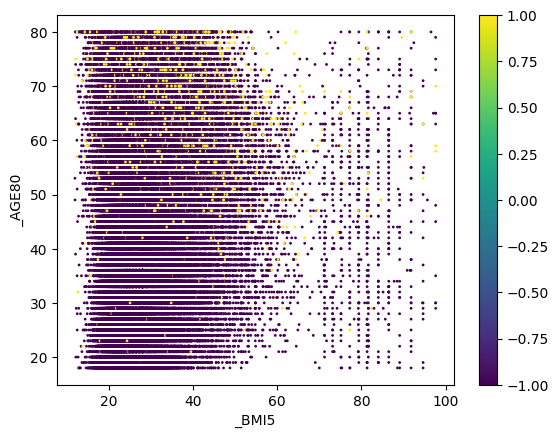

In [169]:
df_filtered.plot.scatter(x="_BMI5", y="_AGE80", s=1,c=y_train, colormap='viridis')

#DROCDY3_ --> Calculated variable for drink-occasions-per-day
#FRUTDA1_ --> Calculated variable for fruit intake in times per day
#_FRUTSUM Calculated variable for total fruits consumed per day
# MAXVO2_ Calculated variable for estimated age-gender specific maximum oxygen consumption. MAXVO2_is derived from SEX and AGE.
# FC60_ Calculated variable for estimated functional capacity

In [166]:
# REMOVE COLS WITH TOO MANY NAN

thr_nan = 0.75

# Calculate the threshold for NaN values
threshold = thr_nan * len(df_filtered)

# Identify columns to drop
cols_to_drop = df_filtered.columns[df_filtered.isna().sum() > threshold]

# Print the names of the columns that will be dropped
print("Columns to be dropped:", cols_to_drop.tolist())

# Drop the columns
df_filtered.drop(columns=cols_to_drop, inplace=True)
df_filtered

Columns to be dropped: []


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0,4.61,0.71,1,0,0.71,1,...,20.78,1,1,1,2.0,0,3,NaN,1,2
1,1,NaN,NaN,100,4.91,NaN,0,1,NaN,1,...,28.70,1,1,1,2.0,99900,2,NaN,1,9
2,2,1.0,0.0,13,4.11,2.00,1,0,2.03,9,...,NaN,1,1,1,1.0,93,4,1.0,1,1
3,3,2.0,2.0,0,4.11,0.00,1,0,0.00,9,...,27.96,1,1,2,1.0,0,2,2.0,1,2
4,4,NaN,NaN,900,999.00,0.50,1,0,1.50,9,...,24.39,1,1,1,2.0,99900,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71,4.91,1.00,1,0,1.00,1,...,24.69,1,1,1,2.0,1000,4,NaN,1,1
328131,328131,2.0,2.0,0,5.10,1.00,1,0,1.00,1,...,24.39,1,1,9,2.0,0,3,NaN,1,1
328132,328132,1.0,0.0,0,3.92,1.00,1,0,1.00,9,...,58.53,1,1,1,2.0,0,3,2.0,1,1
328133,328133,2.0,0.0,0,6.23,0.07,1,0,0.07,1,...,35.87,2,1,1,2.0,0,2,NaN,1,2


In [23]:
# REMOVE PATIENTS WITH TOO MANY NaN

# NO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Impute missing Values

In [167]:
# IMPUTE MISSING VALUES

for col_name in df_filtered.columns:
    try:
        col = data_dict[col_name]
    except KeyError:
        print(f"Column {col_name} not in the dict.")
        continue  # Skip to the next iteration if the column is not found

    type_feature = col[1]
    nan_symbol = col[0]

    #print(f"{col_name} {type_feature} {nan_symbol}")

    if type_feature == "continous":
        # Replace NaN values with the mean of the feature
            # but the mean shpodun not be calculayed using the NaN-symols, otherwise the men will be skewed
        df_filtered[col_name] = df_filtered[col_name].replace(nan_symbol, None)  # Replace NaN symbols with Mean
            # in these way "9999" will not be used for clauclatignthe means
        mean_value = df_filtered[col_name].mean() # ATTENTION TO NOT OCUNT NAN
        df_filtered[col_name] = df_filtered[col_name].fillna(mean_value)  # Replace NaN with Mean
        
    elif type_feature == "discrete":
        # Handle NaN values for discrete features
        if nan_symbol == "nan":  # No predefined category for missing
            df_filtered[col_name] = df_filtered[col_name].fillna(-1)  # Replace with -1 for missing
        elif nan_symbol != "no_missing":
            df_filtered[col_name] = df_filtered[col_name].fillna(nan_symbol)  # Replace NaN with predefined missing value

display(df_filtered)

#Check for Nan Values
print(df_filtered.columns[df_filtered.isna().any()].tolist())

Column Id not in the dict.


/tmp/ipykernel_315458/2114852876.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered[col_name] = df_filtered[col_name].fillna(mean_value)  # Replace NaN with Mean


,Id,ACTIN11_,ACTIN21_,DROCDY3_,FC60_,FRUTDA1_,_FRTRESP,_FRUITEX,_FRUTSUM,_HCVU651,...,_BMI5,_CASTHM1,_CHLDCNT,_CHOLCHK,_DRDXAR1,_DRNKWEK,_EDUCAG,_FLSHOT6,_FRT16,_FRTLT1
0,0,1.0,1.0,0.000000,4.610000,0.710000,1,0,0.710000,1,...,20.780000,1,1,1,2.0,0.000000,3,9.0,1,2
1,1,-1.0,-1.0,100.000000,4.910000,1.004961,0,1,1.361799,1,...,28.700000,1,1,1,2.0,262.715064,2,9.0,1,9
2,2,1.0,0.0,13.000000,4.110000,2.000000,1,0,2.030000,9,...,28.033007,1,1,1,1.0,93.000000,4,1.0,1,1
3,3,2.0,2.0,0.000000,4.110000,0.000000,1,0,0.000000,9,...,27.960000,1,1,2,1.0,0.000000,2,2.0,1,2
4,4,-1.0,-1.0,16.102383,4.857376,0.500000,1,0,1.500000,9,...,24.390000,1,1,1,2.0,262.715064,9,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,1.0,1.0,71.000000,4.910000,1.000000,1,0,1.000000,1,...,24.690000,1,1,1,2.0,1000.000000,4,9.0,1,1
328131,328131,2.0,2.0,0.000000,5.100000,1.000000,1,0,1.000000,1,...,24.390000,1,1,9,2.0,0.000000,3,9.0,1,1
328132,328132,1.0,0.0,0.000000,3.920000,1.000000,1,0,1.000000,9,...,58.530000,1,1,1,2.0,0.000000,3,2.0,1,1
328133,328133,2.0,0.0,0.000000,6.230000,0.070000,1,0,0.070000,1,...,35.870000,2,1,1,2.0,0.000000,2,9.0,1,2


[]


# Correlation
Before encoding check if some cols are correlated.
Maybe remove the ones highly correlated.

In [ ]:
# CORRELATION

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_filtered.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Create a mask for correlations greater than 0.6
mask = (correlation_matrix.abs() > 0.9) & (correlation_matrix != 1)

# Get the pairs of columns with high correlation
high_corr_pairs = []

for row in correlation_matrix.index:
    for col in correlation_matrix.columns:
        if mask.loc[row, col]:
            high_corr_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

# Encode Discrete Variables
Chose one hot encode

In [60]:
# ENCODING OF DISCRETE VARIABLES

# Extracting keys where the value indicates "discrete"
discrete_keys = [key for key, value in data_dict.items() if value[1] == "discrete"]
print(discrete_keys)
#df_filtered = 
df_filtered = pd.get_dummies(df_filtered, columns=discrete_keys, drop_first=True)
    #ATTENTION DROP FISRT
print(len(df_filtered.columns))

['ACTIN11_', 'ACTIN21_', '_FRTRESP', '_FRUITEX', '_HCVU651', '_HISPANC', '_INCOMG', '_LMTACT1', '_LMTSCL1', '_LMTWRK1', '_LTASTH1', '_MISFRTN', '_MISVEGN', '_MRACE1', '_PA30021', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PAREC1', '_PASTAE1', '_PASTRNG', '_PNEUMO2', '_PRACE1', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_RFBING5', '_RFBMI5', '_RFCHOL', '_RFDRHV5', '_RFHLTH', '_RFHYPE5', '_RFSEAT2', '_RFSEAT3', '_RFSMOK3', '_SMOKER3', '_TOTINDA', '_VEG23', '_VEGETEX', '_VEGLT1', 'PAMISS1_', '_AIDTST3', '_ASTHMS1', '_CASTHM1', '_CHLDCNT', '_CHOLCHK', '_DRDXAR1', '_EDUCAG', '_FLSHOT6', '_FRT16', '_FRTLT1']
182


# Normalize Countinous Variables

ATTENTION:
- test and train must be normlized separated (aboid info leckage)
- normalization happens along feautures, i.e. each column

In [61]:
# NORMALIZATION OF CONTINOUS VARIABLES

continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
normalization = "minmax" #minmax, z-score, nothing, robust_scalar

print("values before normalization:\n")
display(df_filtered[continuous_keys])

# Normalization Techniques
# 1. Min-Max Scaling
if normalization == "minmax":
    for key in continuous_keys:
        column = df_filtered[key]
        mean_value = np.nanmean(column)  # Calculate mean ignoring NaNs
        column[np.isnan(column)] = mean_value  # Replace NaNs with mean

        # Min-Max Normalization
        min_value = np.min(column)
        max_value = np.max(column)
        column = (column - min_value) / (max_value - min_value)
        
        # Update the column in df_filtered
        df_filtered[key] = column

# 2. Z-score
if False:
    for key in continuous_keys:
        column = df_filtered[key]
        mean_value = np.nanmean(column)
        std_value = np.nanstd(column)  # Standard deviation ignoring NaNs
        column[np.isnan(column)] = mean_value  # Fill NaNs with mean
        column = (column - mean_value) / std_value
        df_filtered[key] = column

# 3. Robust Scalar
if False:
    for key in continuous_keys:
        column = df_filtered[key]
        median_value = np.nanmedian(column)
        q1 = np.nanpercentile(column, 25)  # 25th percentile
        q3 = np.nanpercentile(column, 75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        column[np.isnan(column)] = median_value  # Fill NaNs with median
        column = (column - median_value) / iqr
        df_filtered[key] = column

df_filtered

values before normalization:



,DROCDY3_,FC60_,FRUTDA1_,_FRUTSUM,_MINAC11,_MINAC21,_VEGESUM,GRENDAY_,MAXVO2_,METVL11_,...,PAFREQ1_,PAFREQ2_,PAMIN11_,PAMIN21_,PAVIG11_,PAVIG21_,VEGEDA1_,_AGE80,_BMI5,_DRNKWEK
0,0.000000,4.61,0.710000,0.710000,60.000000,140.000000,1.210000,0.100000,26.91,3.500000,...,2.000000,4.667000,60.000000,140.000000,0.00000,0.000000,0.710000,57,20.780000,0.000000
1,100.000000,4.91,1.004961,1.361799,229.539738,129.760626,1.949433,0.567969,28.65,4.170547,...,4.027582,3.128048,313.132584,181.398664,82.10056,51.004438,0.802999,57,28.700000,262.715064
2,13.000000,4.11,2.000000,2.030000,90.000000,0.000000,2.860000,1.000000,23.95,3.500000,...,3.000000,3.128048,90.000000,0.000000,0.00000,0.000000,1.000000,65,28.033007,93.000000
3,0.000000,4.11,0.000000,0.000000,600.000000,180.000000,2.780000,1.000000,23.95,4.500000,...,5.000000,1.000000,1200.000000,360.000000,600.00000,180.000000,1.000000,65,27.960000,0.000000
4,16.102383,999.00,0.500000,1.500000,280.000000,129.760626,1.730000,0.130000,999.00,3.500000,...,4.667000,3.128048,313.132584,181.398664,82.10056,51.004438,0.830000,61,24.390000,262.715064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,71.000000,4.91,1.000000,1.000000,75.000000,120.000000,1.890000,0.330000,28.65,3.500000,...,3.000000,1.000000,75.000000,120.000000,0.00000,0.000000,1.000000,57,24.690000,1000.000000
328131,0.000000,5.10,1.000000,1.000000,450.000000,21.000000,2.340000,1.000000,29.75,6.800000,...,5.000000,0.467000,900.000000,42.000000,450.00000,21.000000,0.200000,55,24.390000,0.000000
328132,0.000000,3.92,1.000000,1.000000,120.000000,0.000000,0.780000,0.070000,22.84,3.500000,...,4.000000,3.128048,120.000000,0.000000,0.00000,0.000000,0.570000,68,58.530000,0.000000
328133,0.000000,6.23,0.070000,0.070000,14.000000,0.000000,0.360000,0.170000,36.35,7.300000,...,0.467000,3.128048,28.000000,0.000000,14.00000,0.000000,0.130000,43,35.870000,0.000000


/tmp/ipykernel_315458/336054439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with mean
/tmp/ipykernel_315458/336054439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs with mean
/tmp/ipykernel_315458/336054439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.isnan(column)] = mean_value  # Replace NaNs wi

,Id,DROCDY3_,FC60_,FRUTDA1_,_FRUTSUM,_MINAC11,_MINAC21,_VEGESUM,GRENDAY_,MAXVO2_,...,_DRDXAR1_2.0,_EDUCAG_2,_EDUCAG_3,_EDUCAG_4,_EDUCAG_9,_FLSHOT6_2.0,_FLSHOT6_9.0,_FRT16_1,_FRTLT1_2,_FRTLT1_9
0,0,0.000000,0.003667,0.007172,0.004733,0.001122,0.002946,0.006072,0.001010,0.021501,...,True,False,True,False,False,False,True,True,True,False
1,1,1.000000,0.003968,0.010151,0.009079,0.004294,0.002731,0.009782,0.005737,0.023252,...,True,True,False,False,False,False,True,True,False,True
2,2,0.130000,0.003166,0.020202,0.013533,0.001684,0.000000,0.014351,0.010101,0.018521,...,False,False,False,True,False,False,False,True,False,False
3,3,0.000000,0.003166,0.000000,0.000000,0.011223,0.003788,0.013950,0.010101,0.018521,...,False,True,False,False,False,True,False,True,True,False
4,4,0.161024,1.000000,0.005051,0.010000,0.005238,0.002731,0.008681,0.001313,1.000000,...,True,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,0.710000,0.003968,0.010101,0.006667,0.001403,0.002525,0.009484,0.003333,0.023252,...,True,False,False,True,False,False,True,True,False,False
328131,328131,0.000000,0.004158,0.010101,0.006667,0.008418,0.000442,0.011742,0.010101,0.024360,...,True,False,True,False,False,False,True,True,False,False
328132,328132,0.000000,0.002976,0.010101,0.006667,0.002245,0.000000,0.003914,0.000707,0.017404,...,True,False,True,False,False,True,False,True,False,False
328133,328133,0.000000,0.005290,0.000707,0.000467,0.000262,0.000000,0.001806,0.001717,0.031003,...,True,True,False,False,False,False,True,True,True,False


# Feature engeneering
    - PCA
    - combinaing features ex. polynomial

In [109]:
x_train____,x_test,y_train,train_ids,test_ids = load_csv_data("data/dataset", sub_sample=False)


In [69]:
print(y_train)

[-1 -1 -1 ... -1 -1 -1]


In [63]:
d = df_filtered

d = d.drop("Id", axis=1)
print(d.dtypes.unique())

# Convert boolean columns to integers
for col in d.select_dtypes(include=['bool']).columns:
    d[col] = d[col].astype(int)


use = 1

if use == 0:
    # Use all varibales
    x_train = d.to_numpy()
if use == 1:
    # Only use continuos variables
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
if use == 2:
    # Only use BMI and AGE80
    d = d[["_AGE80", "_BMI5"]]
    x_train = d.to_numpy()
if use == 3:
    # Only use continuos variables
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = pca(x_train, variance_threshold=0.9)
if use == 4:
    # Incre the number of continous feaures using polinormilas
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = build_poly(x_train, degree=3)
if use == 5:
    # Use only continuos with pca
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = pca(x_train, variance_threshold=0.8)
if use == 6:
    #only continous with costant term
    continuous_keys = [key for key, value in data_dict.items() if value[1] == "continous"]
    d = d[continuous_keys]
    x_train = d.to_numpy()
    x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]



print(y_train.dtype)
print(x_train.dtype)
display(x_train)
print(x_train.shape)

[dtype('float64') dtype('bool')]
int64
float64


array([[0.00000000e+00, 3.66715094e-03, 7.17171717e-03, ...,
        6.29032258e-01, 1.02300596e-01, 0.00000000e+00],
       [1.00000000e+00, 3.96773709e-03, 1.01511245e-02, ...,
        6.29032258e-01, 1.94791545e-01, 4.93825309e-03],
       [1.30000000e-01, 3.16617404e-03, 2.02020202e-02, ...,
        7.58064516e-01, 1.87002298e-01, 1.74812030e-03],
       ...,
       [0.00000000e+00, 2.97580282e-03, 1.01010101e-02, ...,
        8.06451613e-01, 5.43150765e-01, 0.00000000e+00],
       [0.00000000e+00, 5.29031612e-03, 7.07070707e-04, ...,
        4.03225806e-01, 2.78523882e-01, 0.00000000e+00],
       [0.00000000e+00, 4.04789339e-03, 3.03030303e-02, ...,
        5.32258065e-01, 1.26007240e-01, 0.00000000e+00]])

(328135, 26)


# Cross Validation

In [97]:
def stratified_k_fold_cross_validation(y, tx, k_folds, max_iters, gamma, lambda_ridge, optimization_method, seed=42):
    """Performs Stratified K-Fold Cross-Validation for gradient descent model training using numpy.

    Args:
        y (np.array): Labels (target values), shape=(N,)
        tx (np.array): Input data, shape=(N, D)
        k_folds (int): Number of folds (k) for cross-validation
        max_iters (int): Number of iterations for gradient descent
        gamma (float): Learning rate for gradient descent

    Returns:
        dict: Cross-validation metrics for each fold for both training and validation sets
    """
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Shuffle the data
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    y, tx = y[indices], tx[indices]

    # Group indices by class
    #finds the indices corresponding to that class and stores them in the class_indices dictionary
    class_indices = {}
    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    # Create k folds
    # Each sublist will eventually hold the indices for a fold.
    folds = [[] for _ in range(k_folds)]

    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)  # Shuffle indices for the current class
        fold_sizes = [len(indices) // k_folds] * k_folds # number of samples per fold
        for i in range(len(indices) % k_folds):  #those remaining samples are distributed across the first few folds.
            fold_sizes[i] += 1  # Distribute remaining samples

        current_index = 0
        #r, indices are assigned to each fold in order, ensuring that the samples from each class are distributed proportionally.
        for fold_index in range(k_folds):
            folds[fold_index].extend(indices[current_index:current_index + fold_sizes[fold_index]])
            current_index += fold_sizes[fold_index]

    # Train and validate
    fold_metrics = []  # Store metrics for both training and validation sets
    best_w = None  # Best model (i.e. the parameters that compose it)
    best_accuracy = 0  # Track the best accuracy
    best_f1_score = 0

    for fold in range(k_folds):
        # The current fold is the validation set
        val_indices = folds[fold] 
        # The training set is constructed by concatenating all indices from the other folds
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold])

        # Split the dataset into training and validation sets for this fold
        x_train_fold, x_val_fold = tx[train_indices], tx[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        # Initialize weights (can also be random)
        initial_w = np.zeros(x_train_fold.shape[1])

        # Train the model using mean_squared_error_gd
        if optimization_method == "mse_gd":
            w, train_loss = mean_squared_error_gd(y_train_fold, x_train_fold, initial_w, max_iters, gamma)
        elif optimization_method == "ridge":
            w, train_loss = ridge_regression(y_train_fold, x_train_fold, lambda_=lambda_ridge)
        elif optimization_method == "least_squares":
            w, train_loss = least_squares(y_train_fold, x_train_fold)

        # Compute prediction for train and test set
        val_predictions = np.sign(np.dot(x_val_fold, w)) # ATTENTION: +1, -1
        train_predictions = np.sign(np.dot(x_train_fold, w))

        # Compute training loss (MSE) --> calculated before
        # Compute validation loss (MSE)
        val_error = y_val_fold - np.dot(x_val_fold, w)  # Validation error = true_label - predictions
        val_loss = calculate_mse(val_error)  # MSE on validation set

        # Calculate accuracy on validation set and training set
        val_accuracy = np.mean(val_predictions == y_val_fold)
        train_accuracy = np.mean(train_predictions == y_train_fold)

        # Calculate F1 score on validation set and  training set
        val_f1_score = compute_f1_score(y_val_fold, val_predictions)
        train_f1_score = compute_f1_score(y_train_fold, train_predictions)

        # Append metrics for this fold
        fold_metrics.append({
            'fold': fold + 1,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'val_f1_score': val_f1_score,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'train_f1_score': train_f1_score
        })

        # Print fold metrics
        print(f"Fold {fold + 1}/{k_folds}: Validation Loss={val_loss}, Accuracy={val_accuracy}, F1={val_f1_score}")
        print(f"Fold {fold + 1}/{k_folds}: Training Loss={train_loss}, Accuracy={train_accuracy}, F1={train_f1_score}")
        print("\n")

        # Update best model if current validation accuracy is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_f1_score = val_f1_score
            best_w = w
    
    # Calculate means across folds
    mean_val_accuracy = np.mean([metrics['val_accuracy'] for metrics in fold_metrics])
    mean_val_f1_score = np.mean([metrics['val_f1_score'] for metrics in fold_metrics])
    mean_train_accuracy = np.mean([metrics['train_accuracy'] for metrics in fold_metrics])
    mean_train_f1_score = np.mean([metrics['train_f1_score'] for metrics in fold_metrics])


    return fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score


In [98]:
# Hyperparameters
max_iters = 10 # Number of iterations for gradient descent
gamma = 0.1  # Learning rate
k_folds = 10  # Number of folds for cross-validation
lambda_ridge = 0.1
optimization_method = "mse_gd" #mse_gd, msg_sgd, least_squares, ridge

# Run cross-validation
fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation(
    y = y_train, 
    tx = x_train, 
    k_folds = k_folds, 
    max_iters = max_iters, 
    gamma = gamma, 
    lambda_ridge = lambda_ridge, 
    optimization_method = optimization_method
    )


print(best_accuracy)
print(best_f1_score)
print(best_w)

GD iter. 1/10: loss=0.25, w0=0.006496526496682637, w1=0.0005198924188934538
GD iter. 2/10: loss=0.22901576470805293, w0=0.012365466512230434, w1=0.0009892974832182778
GD iter. 3/10: loss=0.21112831025703668, w0=0.017656092514947146, w1=0.0014121324431987322
GD iter. 4/10: loss=0.19587942315104678, w0=0.022413877797004746, w1=0.001792012984591979
GD iter. 5/10: loss=0.1828787029609883, w0=0.026680788911372044, w1=0.0021322764373781205
GD iter. 6/10: loss=0.17179352618939966, w0=0.03049555560239492, w1=0.002436003198306647
GD iter. 7/10: loss=0.16234049545625437, w0=0.033893919962121495, w1=0.002706036504761066
GD iter. 8/10: loss=0.154278154182202, w0=0.03690886641116364, w1=0.0029450006868244278
GD iter. 9/10: loss=0.14740077947900826, w0=0.03957083397984287, w1=0.0031553180146635445
GD iter. 10/10: loss=0.14153309367540906, w0=0.04190791225179506, w1=0.0033392242493363133
Fold 1/10: Validation Loss=0.13608092250355705, Accuracy=0.5, F1=1.0
Fold 1/10: Training Loss=0.14153309367540906,

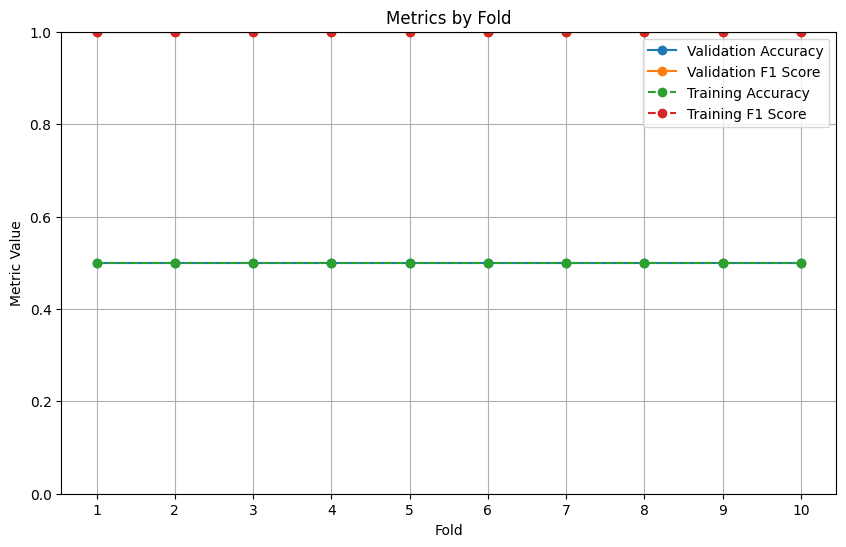

In [99]:
"""Plot the accuracy and F1 score for each fold."""
folds = [metrics['fold'] for metrics in fold_metrics]
val_accuracies = [metrics['val_accuracy'] for metrics in fold_metrics]
val_f1_scores = [metrics['val_f1_score'] for metrics in fold_metrics]
train_accuracies = [metrics['train_accuracy'] for metrics in fold_metrics]
train_f1_scores = [metrics['train_f1_score'] for metrics in fold_metrics]

plt.figure(figsize=(10, 6))

# Plot Validation Accuracy and F1 Score
plt.plot(folds, val_accuracies, label='Validation Accuracy', marker='o', linestyle='-')
plt.plot(folds, val_f1_scores, label='Validation F1 Score', marker='o', linestyle='-')
plt.plot(folds, train_accuracies, label='Training Accuracy', marker='o', linestyle='--')
plt.plot(folds, train_f1_scores, label='Training F1 Score', marker='o', linestyle='--')

plt.title('Metrics by Fold')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.xticks(folds)
plt.ylim(0, 1)  # Assuming accuracy and F1 scores are between 0 and 1
plt.legend()
plt.grid()
plt.show()

Fold 1/10: Validation Loss=0.09774528311489915, Accuracy=0.49913733609385785, F1=0.9991365912623037
Fold 1/10: Training Loss=0.1006223060107327, Accuracy=0.49829351535836175, F1=0.9982905982905983


Fold 2/10: Validation Loss=0.1003005576272579, Accuracy=0.4975845410628019, F1=0.9975786924939467
Fold 2/10: Training Loss=0.1003330870068894, Accuracy=0.49842773325152434, F1=0.9984252573359963


Fold 3/10: Validation Loss=0.10176223181175034, Accuracy=0.4979296066252588, F1=0.9979253112033196
Fold 3/10: Training Loss=0.10016292607822516, Accuracy=0.4983702112973118, F1=0.9983675507499663


Fold 4/10: Validation Loss=0.09967957310627304, Accuracy=0.49913733609385785, F1=0.9991365912623037
Fold 4/10: Training Loss=0.10040807639419007, Accuracy=0.4981976454346742, F1=0.9981943910872071


Fold 5/10: Validation Loss=0.09948813132882721, Accuracy=0.4984472049689441, F1=0.9984447900466563
Fold 5/10: Training Loss=0.10042255266384867, Accuracy=0.4983702112973118, F1=0.9983675507499663


Fold 6/10

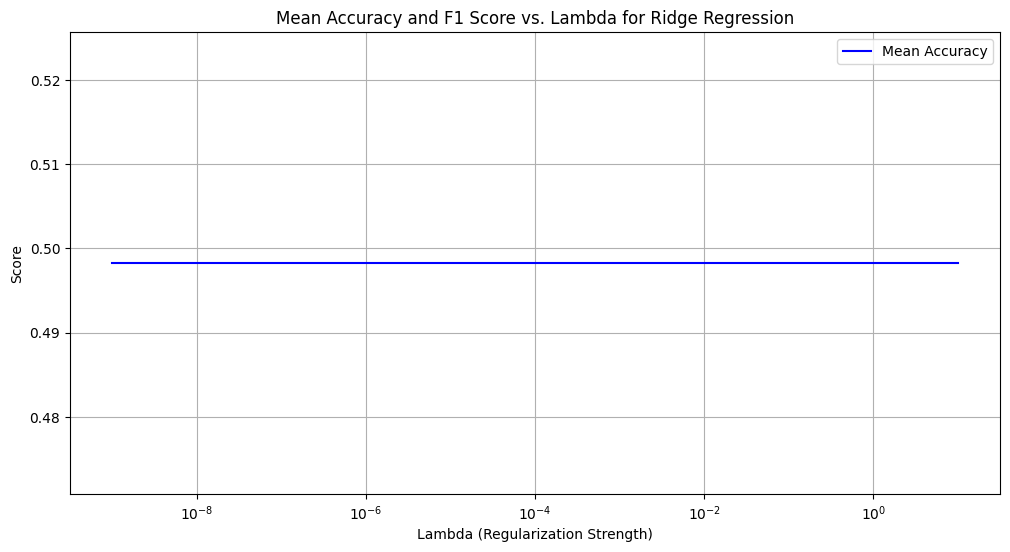

In [100]:
mean_accuracies = []
mean_f1_scores = []
lambdas = np.logspace(-9, 1, 100)


for lambda_ridge in lambdas:
    # Perform stratified k-fold cross-validation
    fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation(
        y = y_train, 
        tx = x_train, 
        k_folds = k_folds, 
        max_iters = max_iters, 
        gamma = gamma, 
        lambda_ridge = 0.1, 
        optimization_method = "ridge"
        )
    
    mean_accuracies.append(mean_val_accuracy)
    mean_f1_scores.append(mean_val_f1_score)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
#plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')

plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

# Logistic regression

In [47]:
temp_y_train[:100]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [70]:

x_train = x_train 
y_train = np.where(y_train == -1, 0, y_train)

print(y_train[:1000])


[0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [93]:
# balance the classes

class_0_indices = np.where(y_train == 0)[0]  # Indices of the class 0 samples
class_1_indices = np.where(y_train == 1)[0]  # Indices of the class 1 samples

# Determine the size of the smaller class
minority_class_size = min(len(class_0_indices), len(class_1_indices))

# Randomly sample from the larger class to match the minority class size
if len(class_0_indices) > len(class_1_indices):
    class_0_indices = np.random.choice(class_0_indices, size=minority_class_size, replace=False)
else:
    class_1_indices = np.random.choice(class_1_indices, size=minority_class_size, replace=False)

# Combine the sampled indices from both classes
balanced_indices = np.concatenate([class_0_indices, class_1_indices])

# Subsample the training set to get balanced data
x_train_balanced = x_train[balanced_indices]
y_train_balanced = y_train[balanced_indices]

x_train = x_train_balanced
y_train = y_train_balanced

print(x_train.shape)
print(y_train.shape)

In [75]:
def stratified_k_fold_cross_validation_logistic_regression(y, tx, k_folds, max_iters, gamma = 0.1, lambda_=0.1, optimization_method="lg", seed=42):

    # Set random seed for reproducibility
    np.random.seed(seed)

    # Shuffle the data
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    y, tx = y[indices], tx[indices]

    # Group indices by class
    #finds the indices corresponding to that class and stores them in the class_indices dictionary
    class_indices = {}
    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    # Create k folds
    # Each sublist will eventually hold the indices for a fold.
    folds = [[] for _ in range(k_folds)]

    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)  # Shuffle indices for the current class
        fold_sizes = [len(indices) // k_folds] * k_folds # number of samples per fold
        for i in range(len(indices) % k_folds):  #those remaining samples are distributed across the first few folds.
            fold_sizes[i] += 1  # Distribute remaining samples

        current_index = 0
        #r, indices are assigned to each fold in order, ensuring that the samples from each class are distributed proportionally.
        for fold_index in range(k_folds):
            folds[fold_index].extend(indices[current_index:current_index + fold_sizes[fold_index]])
            current_index += fold_sizes[fold_index]

    # Train and validate
    fold_metrics = []  # Store metrics for both training and validation sets
    best_w = None  # Best model (i.e. the parameters that compose it)
    best_accuracy = 0  # Track the best accuracy
    best_f1_score = 0

    for fold in range(k_folds):
        # The current fold is the validation set
        val_indices = folds[fold] 
        # The training set is constructed by concatenating all indices from the other folds
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold])

        # Split the dataset into training and validation sets for this fold
        x_train_fold, x_val_fold = tx[train_indices], tx[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        initialization_w = "zeros"

        # Initialize weights (can also be random)
        if initialization_w == "zeros":
            initial_w = np.zeros(x_train_fold.shape[1])
        elif initialization_w == "Xavier":
            #Xavier/Glorot
            fan_in = x_train.shape[1]  # Number of input features
            fan_out = 1  # For binary classification
            limit = np.sqrt(6 / (fan_in + fan_out))
            initial_w = np.random.uniform(-limit, limit, size=x_train_fold.shape[1])
        elif initialization_w == "normal":
            initial_w = np.random.normal(0, 0.01, size=x_train_fold.shape[1]) 
        elif initialization_w == "random":
            initial_w = np.random.uniform(-0.01, 0.01, size=x_train_fold.shape[1])
        

        # Train the model using mean_squared_error_gd
        if optimization_method == "lg":
            w, train_loss = logistic_regression(y_train_fold, x_train_fold, initial_w, max_iters, gamma)
        elif optimization_method == "lg_L2":
            w, train_loss = reg_logistic_regression(y_train_fold, x_train_fold, initial_w, max_iters, gamma, lambda_)


        # Compute prediction for train and test set
        val_logits = np.dot(x_val_fold, w)
        val_prob = sigmoid(val_logits)
        val_predictions = (val_prob > 0.5).astype(int)

        train_logits = np.dot(x_train_fold, w)
        train_prob = sigmoid(train_logits)
        train_predictions = (train_prob > 0.5).astype(int)

        # Compute training loss (MSE) --> calculated before
        # Compute validation loss (MSE)
        val_error = y_val_fold - np.dot(x_val_fold, w)  # Validation error = true_label - predictions
        val_loss = calculate_mse(val_error)  # MSE on validation set

        # Calculate accuracy on validation set and training set
        val_accuracy = np.mean(val_predictions == y_val_fold)
        train_accuracy = np.mean(train_predictions == y_train_fold)

        # Calculate F1 score on validation set and  training set
        val_f1_score = compute_f1_score(y_val_fold, val_predictions)
        train_f1_score = compute_f1_score(y_train_fold, train_predictions)

        # Append metrics for this fold
        fold_metrics.append({
            'fold': fold + 1,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'val_f1_score': val_f1_score,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'train_f1_score': train_f1_score
        })

        # Print fold metrics
        print(f"Fold {fold + 1}/{k_folds}: Validation Loss={val_loss}, Accuracy={val_accuracy}, F1={val_f1_score}")
        print(f"Fold {fold + 1}/{k_folds}: Training Loss={train_loss}, Accuracy={train_accuracy}, F1={train_f1_score}")
        print("\n")

        # Update best model if current validation accuracy is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_f1_score = val_f1_score
            best_w = w
    
    # Calculate means across folds
    mean_val_accuracy = np.mean([metrics['val_accuracy'] for metrics in fold_metrics])
    mean_val_f1_score = np.mean([metrics['val_f1_score'] for metrics in fold_metrics])
    mean_train_accuracy = np.mean([metrics['train_accuracy'] for metrics in fold_metrics])
    mean_train_f1_score = np.mean([metrics['train_f1_score'] for metrics in fold_metrics])


    return fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score


In [94]:
# Hyperparameters
max_iters = 10 # Number of iterations for gradient descent
gamma = 0.01  # Learning rate
k_folds = 10  # Number of folds for cross-validation
lambda_ = 100 # for 
optimization_method = "lg_L2" #lg, lg_L2

# Run cross-validation
fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation_logistic_regression(
    y = y_train, 
    tx = x_train, 
    k_folds = k_folds, 
    max_iters = max_iters, 
    gamma = gamma, 
    lambda_ = lambda_, 
    optimization_method = optimization_method
    )

print(best_accuracy)
print(best_f1_score)
print(best_w)

Iteration 1/10, Loss: 0.6931, Weights: [-8.09722766e-05 -1.46701395e-05 -2.94422947e-06 -1.06866369e-06
  8.22648334e-08  2.41959992e-07 -1.89474004e-06 -2.26631572e-06
 -2.77253812e-05 -1.51080308e-05 -4.20966172e-05 -4.22670890e-07
  2.10738464e-06  5.45755667e-06 -7.52493753e-06  7.05535684e-06
  4.43951837e-06  3.64777645e-06  1.37589549e-06  1.03491204e-06
  4.81312294e-06  1.98519314e-06 -9.40162370e-07  5.37443700e-04
  3.40044021e-05 -2.37108042e-06]
Iteration 2/10, Loss: 0.6931, Weights: [-1.14219239e-07 -9.58818797e-09 -8.46838084e-09 -7.85209114e-09
 -3.85769104e-09 -2.45542801e-09 -8.19006066e-09 -4.56259047e-09
 -2.20352671e-08 -2.82080713e-07 -1.88979014e-07 -2.59055257e-09
 -8.63061045e-09 -7.89215092e-09 -8.98715237e-08 -1.05708530e-07
 -3.50464815e-08 -2.67751076e-08 -5.65986194e-09 -3.70739376e-09
 -6.66624482e-09 -3.07038904e-09 -6.89824111e-09 -6.99467940e-07
 -1.69844946e-07 -3.05332378e-09]
Iteration 3/10, Loss: 0.6931, Weights: [-8.08577825e-05 -1.46605292e-05 -2

Iteration 1/10, Loss: 0.6931, Weights: [-8.09722766e-05 -1.46701395e-05 -2.94422947e-06 -1.06866369e-06
  8.22648334e-08  2.41959992e-07 -1.89474004e-06 -2.26631572e-06
 -2.77253812e-05 -1.51080308e-05 -4.20966172e-05 -4.22670890e-07
  2.10738464e-06  5.45755667e-06 -7.52493753e-06  7.05535684e-06
  4.43951837e-06  3.64777645e-06  1.37589549e-06  1.03491204e-06
  4.81312294e-06  1.98519314e-06 -9.40162370e-07  5.37443700e-04
  3.40044021e-05 -2.37108042e-06]
Iteration 2/10, Loss: 0.6931, Weights: [-1.45864317e-04 -2.64158394e-05 -5.30808143e-06 -1.93144674e-06
  1.44219009e-07  4.33072557e-07 -3.41872213e-06 -4.08393089e-06
 -4.99277214e-05 -2.74765361e-05 -7.59628899e-05 -7.63398154e-07
  3.78466174e-06  9.81570986e-06 -1.36347591e-05  1.25939338e-05
  7.95608659e-06  6.53922250e-06  2.47095202e-06  1.85913427e-06
  8.65695505e-06  3.57027726e-06 -1.69919051e-06  9.66699191e-04
  6.10380787e-05 -4.27099808e-06]
Iteration 3/10, Loss: 0.6931, Weights: [-1.97869050e-04 -3.58200476e-05 -7

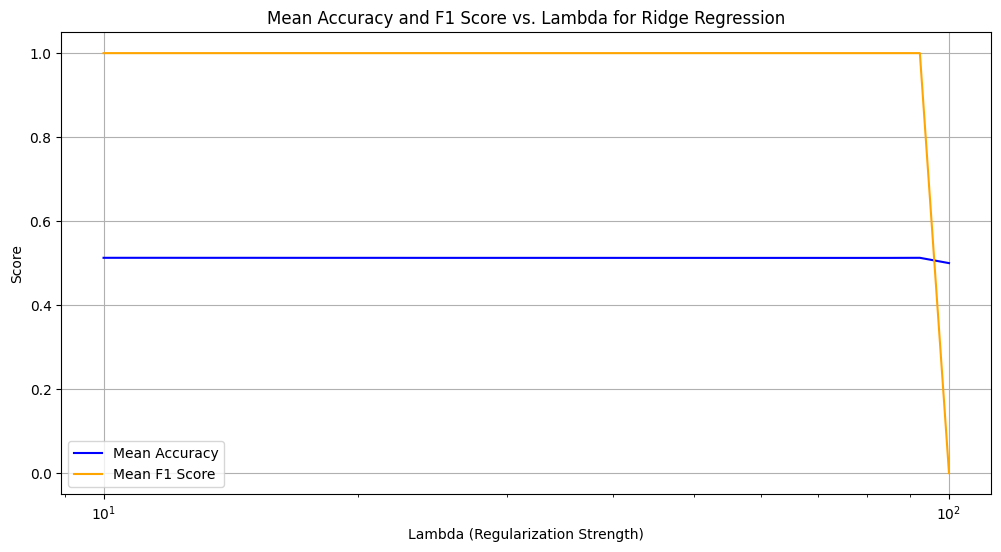

In [95]:
mean_accuracies = []
mean_f1_scores = []
lambdas = np.logspace(1, 2, 30)
optimization_method = "lg_L2"


for lambda_ in lambdas:
    # Perform stratified k-fold cross-validation
    fold_metrics, best_w, best_accuracy, best_f1_score, mean_val_accuracy, mean_val_f1_score, mean_train_accuracy, mean_train_f1_score = stratified_k_fold_cross_validation_logistic_regression(
        y = y_train, 
        tx = x_train, 
        k_folds = k_folds, 
        max_iters = max_iters, 
        gamma = gamma, 
        lambda_ = lambda_, 
        optimization_method = optimization_method
        )
    
    mean_accuracies.append(mean_val_accuracy)
    mean_f1_scores.append(mean_val_f1_score)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')

#plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

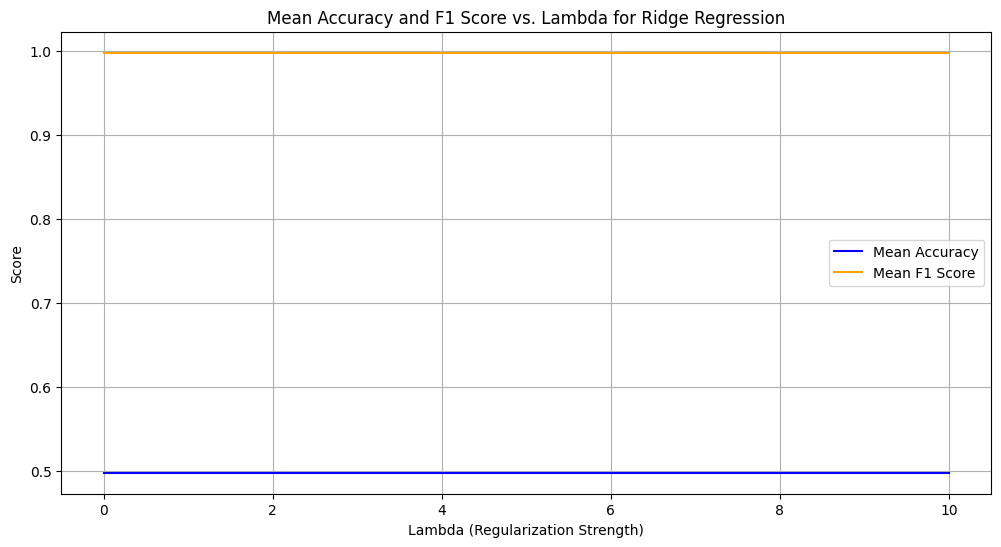

In [101]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, mean_accuracies, label='Mean Accuracy', color='blue')
plt.plot(lambdas, mean_f1_scores, label='Mean F1 Score', color='orange')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score vs. Lambda for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

# SVM

In [106]:
# Instantiate the SVM
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=50)

# Train the model
svm.fit(x_train, y_train)

predictions = svm.predict(x_train)
print("Predictions:", predictions[:])

Predictions: [1. 1. 1. ... 1. 1. 1.]
